In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
data = pd.read_csv('E:\\OneDrive - ptit.edu.vn\\Thuc_tap_tot_nghiep\\mytv_data\\movie_202204.csv', error_bad_lines=False)
len(data)

C:\Users\Bui Quang Dam\AppData\Local\Temp\ipykernel_8836\44957052.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('E:\\OneDrive - ptit.edu.vn\\Thuc_tap_tot_nghiep\\mytv_data\\movie_202204.csv', error_bad_lines=False)
C:\Users\Bui Quang Dam\AppData\Local\Temp\ipykernel_8836\44957052.py:1: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E:\\OneDrive - ptit.edu.vn\\Thuc_tap_tot_nghiep\\mytv_data\\movie_202204.csv', error_bad_lines=False)


11860777

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288538 entries, 0 to 5288537
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   content_id         int64  
 1   content_name       object 
 2   content_type       int64  
 3   date_time          object 
 4   device_id          float64
 5   device_type        int64  
 6   domain_api         object 
 7   drm                float64
 8   duration           int64  
 9   ip_client          object 
 10  member_id          int64  
 11  os_version         object 
 12  part               float64
 13  product_id         int64  
 14  product_plugin_id  float64
 15  provider_id        object 
dtypes: float64(4), int64(6), object(6)
memory usage: 645.6+ MB


In [33]:
data

,content_id,content_name,content_type,date_time,device_id,device_type,domain_api,drm,duration,ip_client,member_id,os_version,part,product_id,product_plugin_id,provider_id
0,136418,Tế Công 3,2,2022-04-20 06:17:52,0.0,15,NaN,NaN,51,10.220.6.122,1859259.0,NaN,1,55.0,15.0,1.0
1,138260,Ê! Nhỏ Lớp Trưởng 3,2,2022-04-20 07:53:36,0.0,15,NaN,NaN,1274,10.80.223.139,1183051.0,NaN,11,27.0,15.0,1.0
2,137452,Máu và Dầu,2,2022-04-20 07:49:27,0.0,15,NaN,NaN,3036,10.217.137.128,17652293.0,NaN,1,55.0,0.0,183.0
3,124987,Đấu Phá Thương Khung,2,2022-04-20 20:45:01,0.0,15,NaN,NaN,262,10.126.13.177,18433997.0,NaN,42,29.0,79.0,14.0
4,138672,Vi Cá Tiền Truyện,20,2022-04-20 10:20:34,0.0,15,NaN,NaN,228,10.57.39.167,851911.0,NaN,2,28.0,6.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11860772,137133,Con Gái Ông Trùm,2,2022-04-12 11:06:52,0.0,9,https://apilogduration.mytvnet.vn,0.0,6,14.251.236.105,1190191.0,7.1.2,8,55.0,79.0,95.0
11860773,137169,Cái Bang Truyền Thuyết,2,2022-04-12 13:37:08,0.0,9,https://apilogduration.mytvnet.vn,0.0,3,14.176.54.216,18060626.0,9,1,99.0,0.0,0.0
11860774,132943,Diệp Vấn Ngoại Truyện: Trương Thiên Chí,2,2022-04-12 22:39:16,0.0,41,https://apilogduration.mytvnet.vn,0.0,1,123.27.226.3,20911640.0,9,1,99.0,0.0,0.0
11860775,132935,John Wick 2,2,2022-04-12 22:39:39,0.0,9,https://apilogduration.mytvnet.vn,0.0,12,14.162.165.235,11065421.0,8.0.0,1,55.0,0.0,0.0


os_version           1.898651e-01
drm                  1.898599e-01
product_plugin_id    1.122737e-01
provider_id          1.093934e-01
domain_api           1.738975e-02
device_id            2.899473e-04
content_name         4.046952e-06
member_id            1.686230e-07
product_id           1.686230e-07
content_id           0.000000e+00
content_type         0.000000e+00
date_time            0.000000e+00
device_type          0.000000e+00
duration             0.000000e+00
ip_client            0.000000e+00
part                 0.000000e+00
dtype: float64


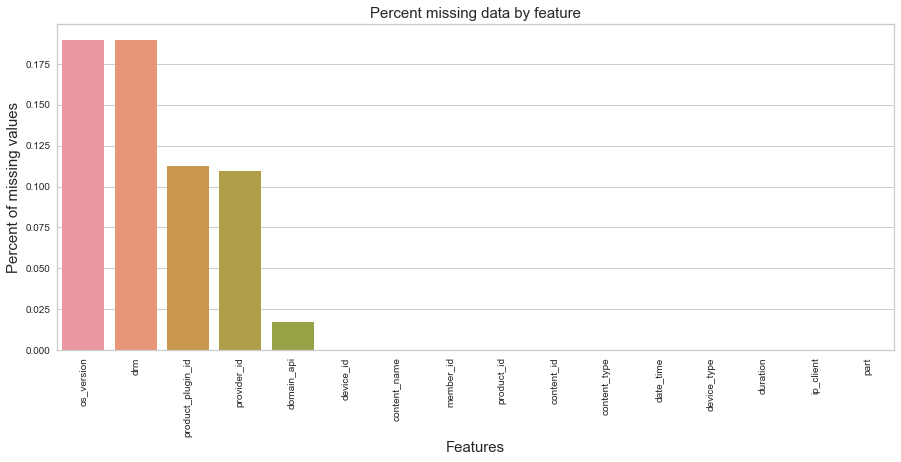

In [34]:
import seaborn as sns
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

print(percent)

In [35]:
cols_del = ['device_id', 'domain_api', 'content_name', 'os_version','drm','product_id', 'product_plugin_id', 'provider_id', 'member_id']
data = data.drop(cols_del, axis=1)

In [36]:
data["date_time"] = pd.to_datetime(data["date_time"])

data["watch_at_time"] =  pd.to_datetime(data['date_time']).dt.hour

data['week_day'] = pd.to_datetime(data['date_time']).dt.dayofweek

data[['date_time','watch_at_time','week_day']]

,date_time,watch_at_time,week_day
0,2022-04-20 06:17:52,6,2
1,2022-04-20 07:53:36,7,2
2,2022-04-20 07:49:27,7,2
3,2022-04-20 20:45:01,20,2
4,2022-04-20 10:20:34,10,2
...,...,...,...
11860772,2022-04-12 11:06:52,11,1
11860773,2022-04-12 13:37:08,13,1
11860774,2022-04-12 22:39:16,22,1
11860775,2022-04-12 22:39:39,22,1


In [37]:
print(data['duration'].value_counts())

1         962241
2         636869
3         593386
4         495027
5         430760
           ...  
21820          1
8654           1
177509         1
143669         1
136225         1
Name: duration, Length: 24577, dtype: int64


In [38]:
# loại bỏ những bản ghi có thời lượng xem dưới 10 phút
data = data[(data['duration'])>600]
data = data[(data['duration'])<86400]
len(data)

3905563

In [39]:
# kiểm tra số lượng missing values của từng đặc trưng
data.isnull().sum(axis = 0)

content_id       0
content_type     0
date_time        0
device_type      0
duration         0
ip_client        0
part             0
watch_at_time    0
week_day         0
dtype: int64

In [13]:
# kiểm tra các thuộc tính có dtypes là object
s = (data.dtypes == 'object')

object_cols = list(s[s].index)

print(object_cols)

['ip_client', 'part']


In [14]:
data

,content_id,content_type,date_time,device_type,duration,ip_client,part,watch_at_time,week_day
0,137570,2,2022-05-16 22:55:33,41,2819,14.240.20.26,8,22,0
1,138395,2,2022-05-16 20:23:52,41,2023,113.166.71.185,3,20,0
7,137606,20,2022-05-16 08:42:22,31,2664,14.236.72.60,5,8,0
12,138833,2,2022-05-16 12:05:33,31,1627,14.236.157.211,53,12,0
14,129213,2,2022-05-16 03:38:28,41,7265,123.23.33.67,1,3,0
...,...,...,...,...,...,...,...,...,...
12141237,137606,20,2022-05-07 19:30:30,41,3672,14.187.67.166,1,19,5
12141241,138324,2,2022-05-07 20:46:08,31,949,14.166.168.136,1,20,5
12141251,132935,2,2022-05-07 02:31:05,41,7344,113.181.208.77,1,2,5
12141252,138834,2,2022-05-07 02:33:33,31,2947,14.162.82.137,36,2,5


In [12]:
# #convert date_time to timestamp
# data["date_time"] = pd.to_datetime(data["date_time"])

# data["date_time"] = data["date_time"].values.astype(np.int64) // 10**9

In [13]:
# data['serie'] = data['part'].astype(int)

# data['serie'] = data['serie'].mask(data['serie'] == 1, 0)
# data['serie'] = data['serie'].mask(data['serie'] > 1, 1)

# data[['serie','part']]

In [40]:
# tạo ra một bản sao dữ liệu
ds = data.copy()
# tạo một tập hợp con dataframe bao gồm các thuộc tính cần được loại bỏ
cols_del = ['date_time', 'part', 'ip_client', 'content_id']
ds = ds.drop(cols_del, axis=1)
ds[:5]

,content_type,device_type,duration,watch_at_time,week_day
1,2,15,1274,7,2
2,2,15,3036,7,2
5,2,15,819,10,2
6,2,15,1072,11,2
7,2,15,1989,12,2


In [41]:
#scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds

,content_type,device_type,duration,watch_at_time,week_day
0,-0.556938,-0.992048,-0.361509,-1.241713,-0.599564
1,-0.556938,-0.992048,0.078058,-1.241713,-0.599564
2,-0.556938,-0.992048,-0.475018,-0.752468,-0.599564
3,-0.556938,-0.992048,-0.411902,-0.589386,-0.599564
4,-0.556938,-0.992048,-0.183138,-0.426304,-0.599564
...,...,...,...,...,...
3905558,-0.556938,-0.478378,-0.044931,0.878351,-1.104107
3905559,-0.556938,-0.157335,-0.435851,-1.404795,-1.104107
3905560,-0.556938,-1.184675,-0.367496,0.226023,-1.104107
3905561,-0.556938,-0.157335,-0.008758,-1.078631,-1.104107


In [42]:
X_train = scaled_ds.loc[:, :]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration', ylabel='watch_at_time'>

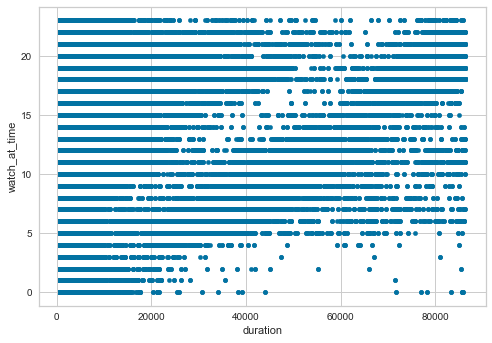

In [43]:
X = data[['duration','watch_at_time']]
X.plot(x = 'duration', y = 'watch_at_time', kind = 'scatter')

In [44]:
def plot_embedding(X, title=None):
    plt.scatter(X[:,0], X[:,1], edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
    plt.colorbar()
    if title is not None:
        plt.title(title)

Computing PCA projection
(3905563, 5)
(3905563, 2)


C:\Users\Bui Quang Dam\AppData\Local\Temp\ipykernel_8836\1558496329.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


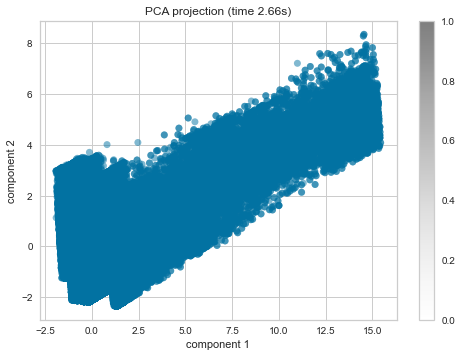

In [45]:
# pca 2
print('Computing PCA projection')
pca = PCA(2) # project from 6 to 2 dimensions
t0 = time()
projected = pca.fit_transform(X_train)

t1 = time() - t0
print(X_train.shape)
print(projected.shape)

plot_embedding(projected, 'PCA projection (time %.2fs)' % t1)
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

In [56]:
#pca 3
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

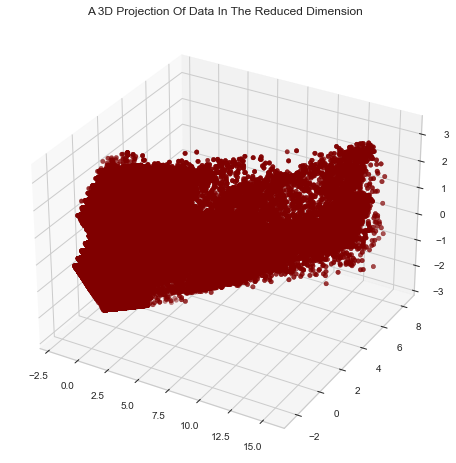

In [57]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [46]:
random_state = 170
X_pca = projected.copy()
X_pca.shape

(3905563, 2)

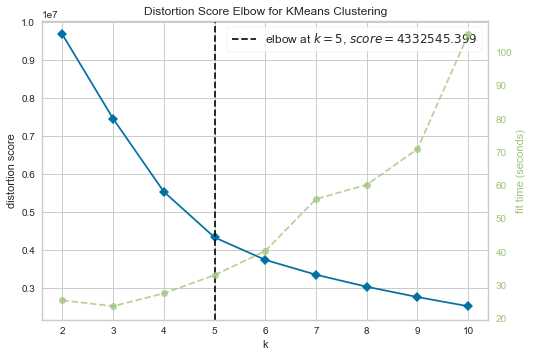

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# sử dụng phương pháp elbow để xác định số cụm
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

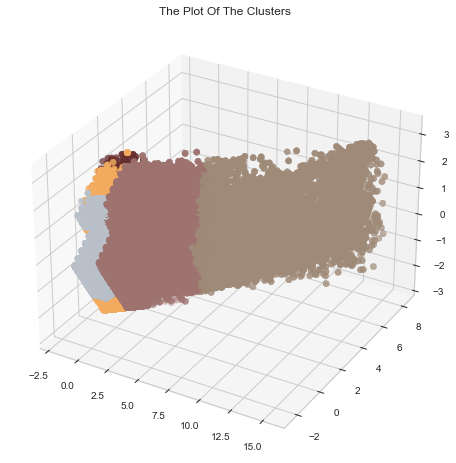

In [60]:
y_means_5 = KMeans(n_clusters=5, random_state=random_state).fit_predict(X_pca)
PCA_ds['Clusters'] = y_means_5
# plt.figure(figsize=(20,20))
# plt.subplot(221)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=y_means_5, cmap='coolwarm_r')
# plt.title('5 Clusters')
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [61]:
data["Clusters"] = y_means_5
data

,content_id,content_type,date_time,device_type,duration,ip_client,part,watch_at_time,week_day,Clusters
1,138260,2,2022-04-20 07:53:36,15,1274,10.80.223.139,11,7,2,4
2,137452,2,2022-04-20 07:49:27,15,3036,10.217.137.128,1,7,2,4
5,130287,2,2022-04-20 10:23:51,15,819,10.223.147.65,46,10,2,4
6,130107,2,2022-04-20 11:59:09,15,1072,10.200.211.194,19,11,2,4
7,138760,2,2022-04-20 12:18:13,15,1989,10.124.175.21,22,12,2,4
...,...,...,...,...,...,...,...,...,...,...
11860758,137570,2,2022-04-12 20:50:36,31,2543,113.165.21.87,8,20,1,2
11860761,138214,2,2022-04-12 06:09:47,41,976,113.177.186.84,31,6,1,4
11860768,138125,2,2022-04-12 16:09:51,9,1250,123.20.130.119,6,16,1,2
11860770,129051,2,2022-04-12 08:12:56,41,2688,14.175.161.86,32,8,1,4


In [62]:
duration_sum = data['duration'].groupby(data['Clusters']).mean()
# duration_sum.plot(kind = 'bar')
duration_sum

Clusters
0     2678.355715
1     2801.365127
2     2284.945544
3    53492.371670
4     2349.444907
Name: duration, dtype: float64

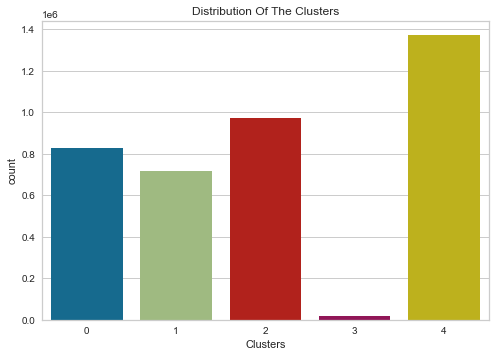

In [74]:
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [63]:
ddf = data[['Clusters', 'content_type']].groupby(['Clusters', 'content_type']).size()
ddf.to_csv('cluster_type.csv')

<AxesSubplot:>

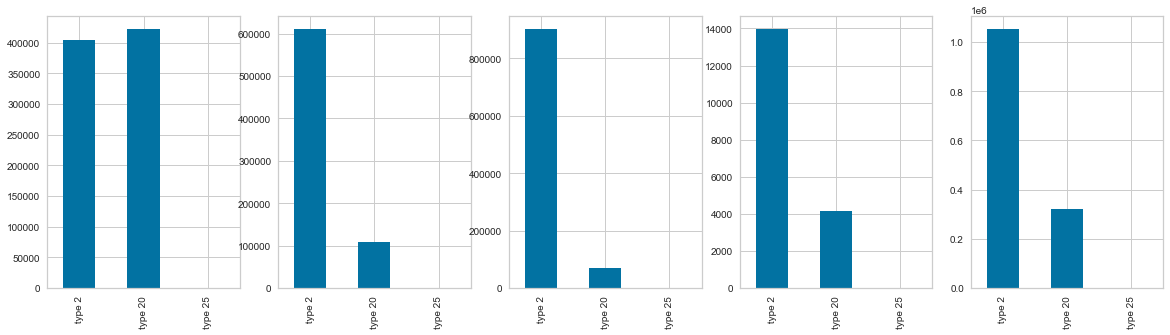

In [64]:
cluster_type = pd.read_csv('cluster_type.csv')
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
cluster_type.loc[0][1:].plot(kind = 'bar')

plt.subplot(1,5,2)
cluster_type.loc[1][1:].plot(kind = 'bar')

plt.subplot(1,5,3)
cluster_type.loc[2][1:].plot(kind = 'bar')

plt.subplot(1,5,4)
cluster_type.loc[3][1:].plot(kind = 'bar')

plt.subplot(1,5,5)
cluster_type.loc[4][1:].plot(kind = 'bar')

In [65]:
df1 = data[['Clusters', 'week_day']].groupby(['Clusters', 'week_day']).size()
df1.to_csv('week_day.csv')

<AxesSubplot:>

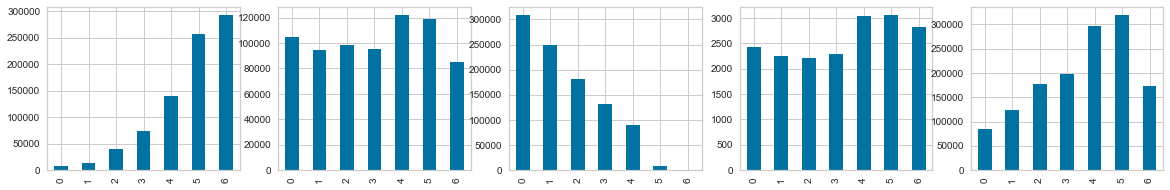

In [66]:
cluster_day = pd.read_csv('week_day.csv')

plt.figure(figsize=(20,3))

plt.subplot(1,5,1)
cluster_day.loc[0][1:].plot(kind = 'bar')

plt.subplot(1,5,2)
cluster_day.loc[1][1:].plot(kind = 'bar')

plt.subplot(1,5,3)
cluster_day.loc[2][1:].plot(kind = 'bar')

plt.subplot(1,5,4)
cluster_day.loc[3][1:].plot(kind = 'bar')

plt.subplot(1,5,5)
cluster_day.loc[4][1:].plot(kind = 'bar')

In [68]:
df2 = data[['Clusters', 'watch_at_time']].groupby(['Clusters', 'watch_at_time']).size()
df2.to_csv('watch_at_time.csv')

<AxesSubplot:>

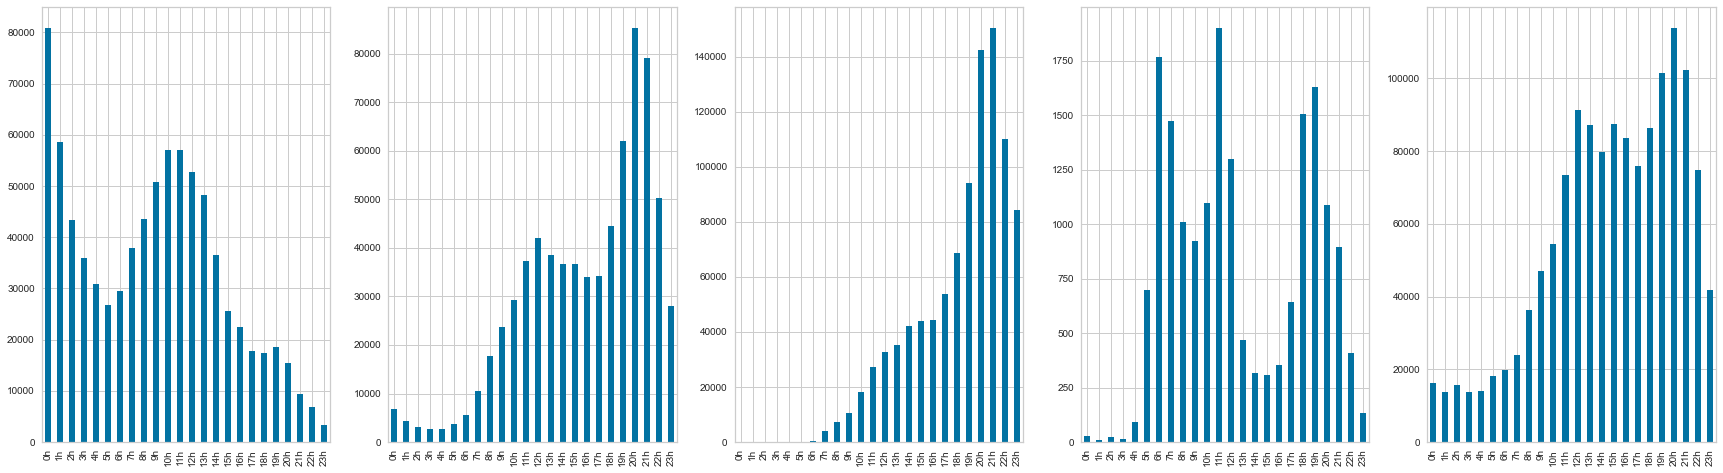

In [70]:
cluster_hour = pd.read_csv('watch_at_time.csv')

plt.figure(figsize=(30,8))

plt.subplot(1,5,1)
cluster_hour.loc[0][1:].plot(kind = 'bar')

plt.subplot(1,5,2)
cluster_hour.loc[1][1:].plot(kind = 'bar')

plt.subplot(1,5,3)
cluster_hour.loc[2][1:].plot(kind = 'bar')

plt.subplot(1,5,4)
cluster_hour.loc[3][1:].plot(kind = 'bar')

plt.subplot(1,5,5)
cluster_hour.loc[4][1:].plot(kind = 'bar')

In [72]:
df3 = data[['Clusters', 'device_type']].groupby(['Clusters', 'device_type']).size()
df3.to_csv('cluster_device.csv')